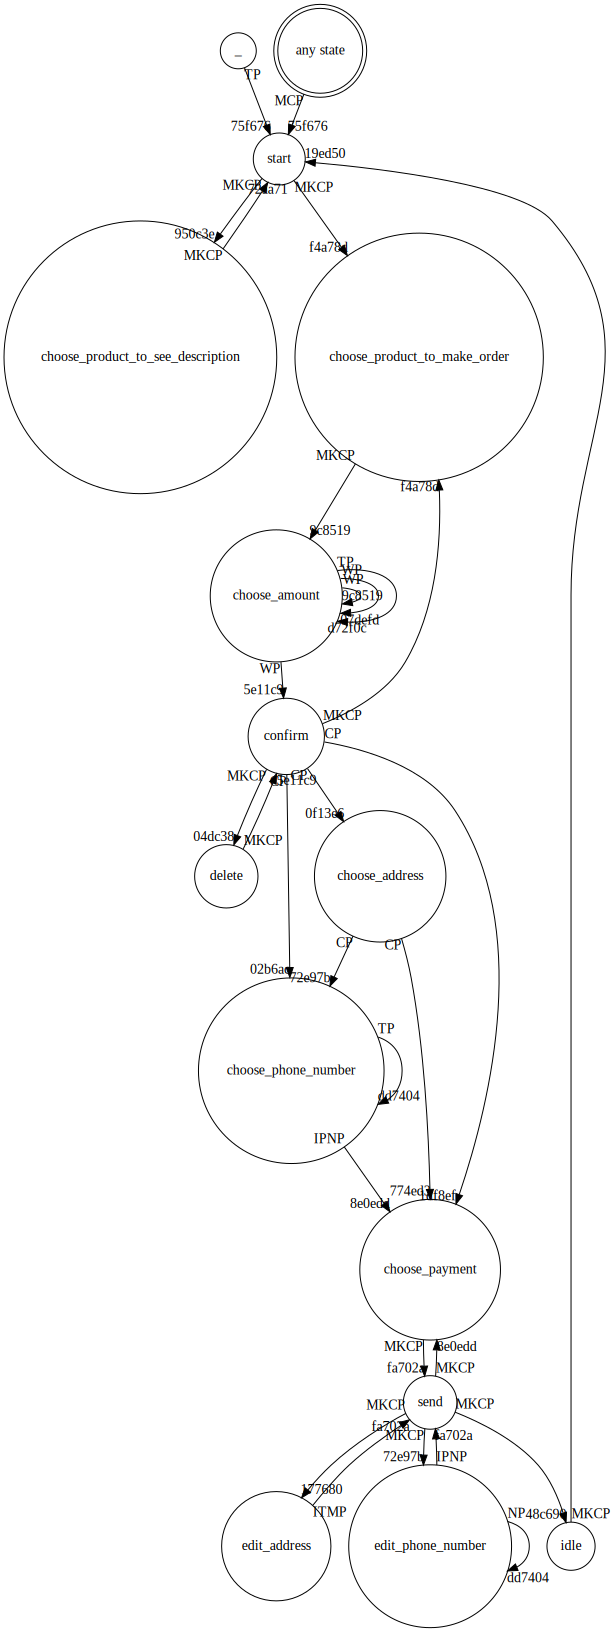

In [3]:
import json
from graphviz import Digraph
import pandas as pd

class ContractTagName:
    def __init__(self):
        self._dict = {}
    def __call__(self,s):
        if s not in self._dict:
            self._dict[s] =  "".join([l for l in s if l==l.upper()])
        return self._dict[s]
    def to_frame(self):
        return pd.DataFrame([{"short":v,"full":k} for k,v in self._dict.items()])

_contractTagName = ContractTagName()
with open("../src/main/resources/transitions.json") as f:
    transitions = json.load(f)
    
# print(transitions["transitions"])
g = Digraph("G")
g.attr("node",shape="circle")

for c in transitions["correspondence"]:
    start_state,end_state,cond,corr = tuple(c)
    
    if start_state is not None and end_state is not None:
        pass
    elif start_state is None and end_state is not None:
        start_state = "any state"
        g.attr("node",shape="doublecircle")
        g.node(start_state)
        g.attr("node",shape="circle")
        
    g.edge(start_state,end_state,headlabel=corr["correspondence"][:6],taillabel=_contractTagName(cond["tag"]))

g

In [4]:
_contractTagName.to_frame()

,short,full
0,TP,TrivialPredicate
1,MKCP,MessageKeyboardComparisonPredicate
2,WP,WidgetPredicate
3,CP,ConjunctionPredicate
4,IPNP,IsPhoneNumberPredicate
5,ITMP,IsTextMessagePredicate
6,NP,NegationPredicate
7,MCP,MessageComparisonPredicate
